# Simple and Multiple Linear Regression
This notebook demonstrates both simple and multiple linear regression using the clean crime dataset.

In [26]:
%pip install statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load the clean dataset
df = pd.read_csv('clean_crime_data.csv')

# Target variable: total crimes
df['total_crimes'] = df[['kidnapping_and_abduction', 'dowry_deaths', 'cruelty_by_husband_or_his_relatives', 'murder_with_rape_gang_rape']].sum(axis=1)


Note: you may need to restart the kernel to use updated packages.


## Simple Linear Regression
Predict total crimes using only 'kidnapping_and_abduction' as the independent variable.

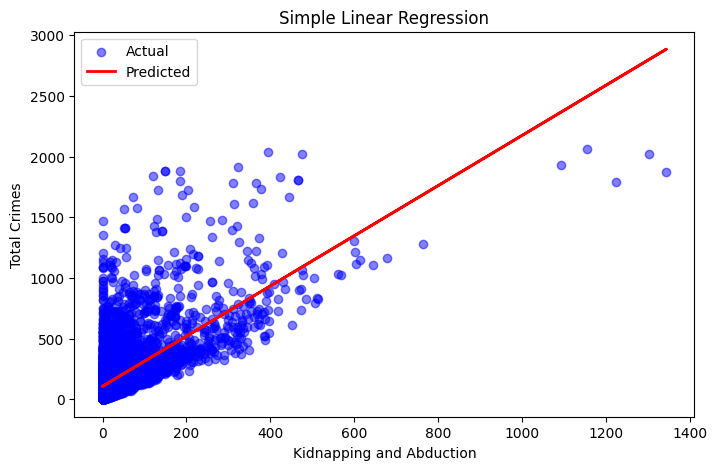

Simple Linear Regression Results:
MSE: 40241.39653025441
R2 Score: 0.42795267888328836


In [27]:
X_simple = df[['kidnapping_and_abduction']].values
y = df['total_crimes'].values
model_simple = LinearRegression()
model_simple.fit(X_simple, y)
y_pred_simple = model_simple.predict(X_simple)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_simple, y, color='blue', alpha=0.5, label='Actual')
plt.plot(X_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Kidnapping and Abduction')
plt.ylabel('Total Crimes')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print('Simple Linear Regression Results:')
print('MSE:', mean_squared_error(y, y_pred_simple))
print('R2 Score:', r2_score(y, y_pred_simple))

## Multiple Linear Regression
Predict total crimes using all four crime categories as independent variables.

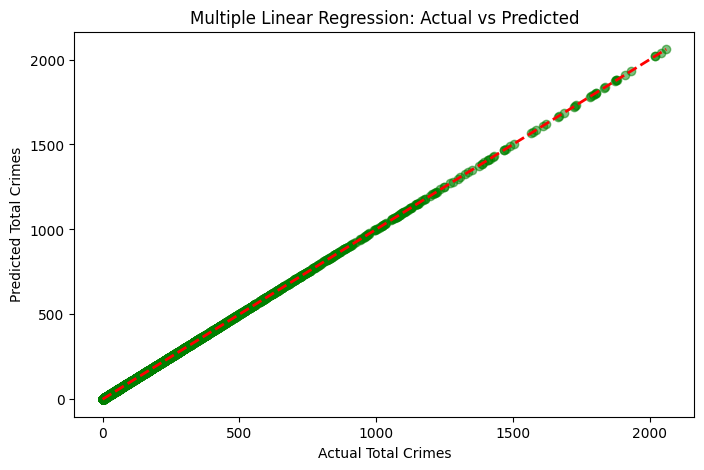

Multiple Linear Regression Results:
MSE: 4.784138218827664e-25
R2 Score: 1.0


In [28]:
X_multi = df[['kidnapping_and_abduction', 'dowry_deaths', 'cruelty_by_husband_or_his_relatives', 'murder_with_rape_gang_rape']].values
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_pred_multi = model_multi.predict(X_multi)

# Plot actual vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred_multi, color='green', alpha=0.5)
plt.xlabel('Actual Total Crimes')
plt.ylabel('Predicted Total Crimes')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.show()

print('Multiple Linear Regression Results:')
print('MSE:', mean_squared_error(y, y_pred_multi))
print('R2 Score:', r2_score(y, y_pred_multi))

## Multiple Linear Regression with Backward Elimination
Backward elimination is a feature selection technique that iteratively removes the least significant features based on p-values until only significant predictors remain.

In [29]:
# Prepare features and target
X_be = df[['kidnapping_and_abduction', 'dowry_deaths', 'cruelty_by_husband_or_his_relatives', 'murder_with_rape_gang_rape']]
y_be = df['total_crimes']

# Add a constant to the model (intercept)
X_be = sm.add_constant(X_be)

# Fit the model
model_be = sm.OLS(y_be, X_be).fit()

# Get the summary of the regression
model_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_crimes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.175e+32
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        14:23:12   Log-Likelihood:             1.3809e+05
No. Observations:                5182   AIC:                        -2.762e+05
Df Residuals:                    5177   BIC:                        -2.761e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                2.716e-13   1.16e-14     23.421      0.000    2.49e-13    2.94e-13
kidnapping_and_abduction                1.0000   1.17e-16   8.51e+15      0.000       1.000       1.000
dowry_deaths                            1.0000   7.74e-16   1.29e+15      0.000       1.000       1.000
cruelty_by_husband_or_his_relatives     1.0000   4.85e-17   2.06e+16      0.000       1.000       1.000
murder_with_rape_gang_rape              1.0000   7.58e-15   1.32e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                     2222.755   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21035.372
Skew:                           1.797   Prob(JB):                         0.00
Kurtosis:                      12.192   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

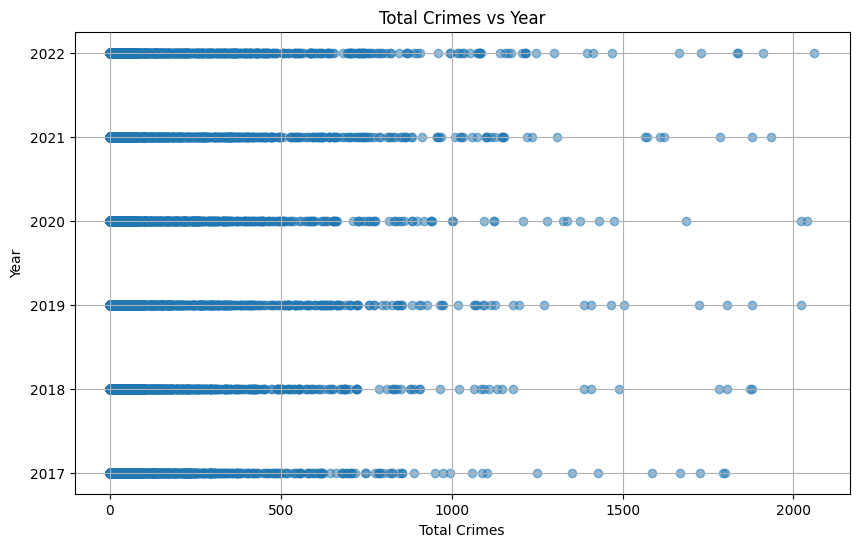

In [30]:
#plot 

plt.figure(figsize=(10, 6))
plt.scatter(df['total_crimes'], df['year'], alpha=0.5)
plt.title('Total Crimes vs Year')
plt.xlabel('Total Crimes')
plt.ylabel('Year')
plt.grid()
plt.show()


In [31]:
# Calculate Adjusted R^2 for Multiple Linear Regression
n = X_multi.shape[0]  # number of samples
p = X_multi.shape[1]  # number of predictors
r2 = r2_score(y, y_pred_multi)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print('Adjusted R2 Score:', adj_r2)

Adjusted R2 Score: 1.0
